In [1]:
#usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#geopandas
import geopandas

In [2]:
#dataset
chipotle = pd.read_csv("../datasets/chipotle_stores.csv")

## First Contact

In [5]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB


In [3]:
chipotle.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [28]:
# Create a copy of the original DataFrame
chipotle_by_state = chipotle.copy()
# Add a new column and set the value to 1
chipotle_by_state['chipotle_count'] = 1

# use groupby() and count() to total up all the chipotle by state
chipotle_by_state = chipotle_by_state[['state',"chipotle_count"]].groupby('state').count()

# sort by most chipotle_count first
chipotle_by_state.sort_values('chipotle_count', ascending=False).head(10)

,chipotle_count
state,
California,421
Texas,226
Ohio,193
Florida,177
New York,160
Illinois,144
Virginia,107
Pennsylvania,96
Maryland,94


<AxesSubplot:ylabel='state'>

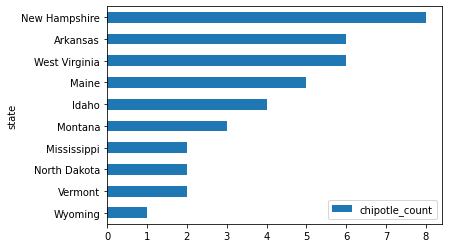

In [25]:
chipotle_by_state.sort_values('chipotle_count', ascending=True)[:10].plot(kind="barh") #States with the less chipotles

<AxesSubplot:ylabel='state'>

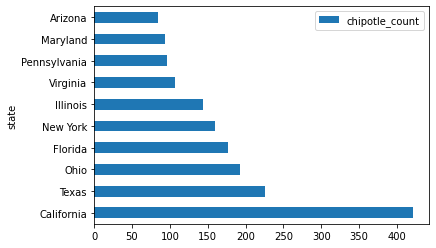

In [26]:
chipotle_by_state.sort_values('chipotle_count', ascending=False)[:10].plot.barh() #States with the most chipotles

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

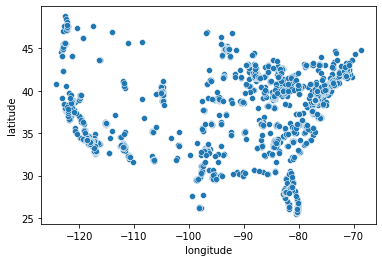

In [31]:
sns.scatterplot(data=chipotle,x="longitude",y="latitude")

## Shapefiles stuff

In [32]:
usa = geopandas.read_file('../shapefiles/2017_us_state/tl_2017_us_state.shp')

In [34]:
usa.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [35]:
usa.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [37]:
usa = usa.to_crs("EPSG:3395")

<AxesSubplot:>

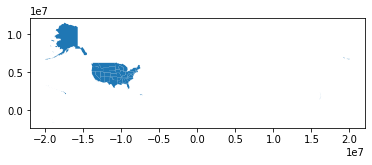

In [40]:
usa.plot()

<AxesSubplot:>

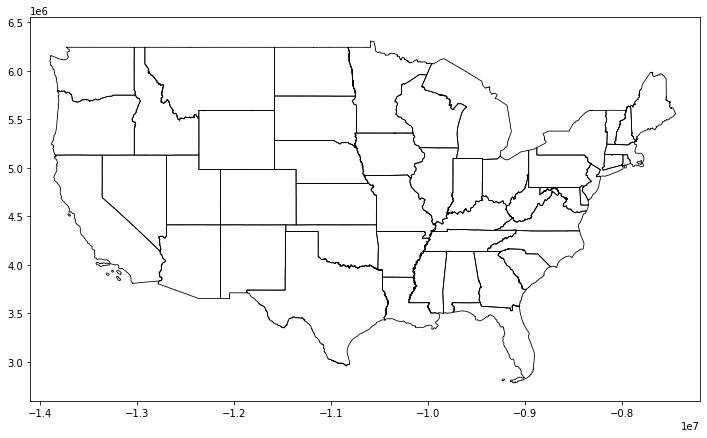

In [44]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
usa.boundary.plot(ax=ax, color='black', linewidth=.8)